## <center> Лабораторная №2

### Задача:

Решить задачу Коши методом Рунге-Кутты со значениями шага $h_1 = 0.1$ и $h_2=0.01$ и сравнить результаты графически.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn')

### Начальные условия:

$y^1 = -\frac{y}{x} - x^2$, 

$y(1)=0.75$, $x \in [1,2]$

In [2]:
y_0 = 0.75
x_0 = 1.
x_1 = 2
h_1 = 0.1
h_2 = 0.01
def f(x,y):
    return -y/x - (x**2)

In [3]:
def Runge_Kutta(x,y,x_1,h):
    x_arr = [x]
    y_arr = [y]
    while x_1 > x:
        K1 = h*f(x,y)
        K2 = h*f(x+0.5*h,y+0.5*K1)
        K3 = h*f(x+0.5*h,y+0.5*K2)
        K4 = h*f(x+h,y+K3)
        y += 1/6*(K1+2*K2+2*K3+K4)
        x += h
        x = round(x,2)
        x_arr += [x]
        y_arr += [y]
    return {'x': np.array(x_arr), 'y': np.array(y_arr)}

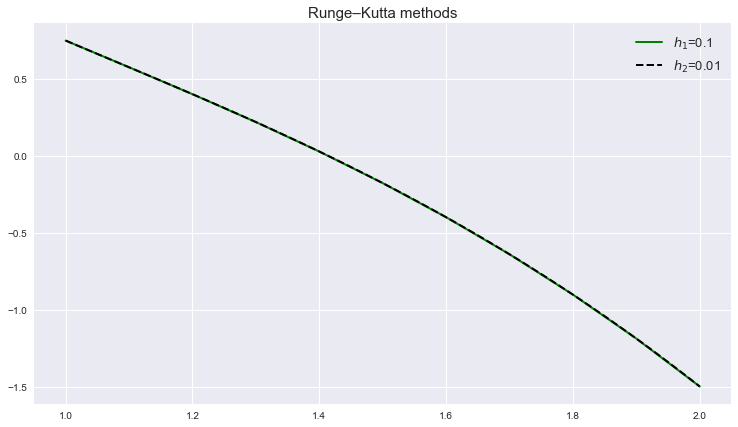

In [4]:
data1 = Runge_Kutta(x_0,y_0,x_1,h_1)
data2 = Runge_Kutta(x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['y'],'-g', label = '$h_1$='+str(h_1),linewidth = 2)
ax.plot(data2['x'],data2['y'],'--k', label = '$h_2$='+str(h_2),linewidth = 2)
plt.legend(fontsize = 13)
plt.title('Runge–Kutta methods', size = 15)
plt.show()

In [5]:
print('Максимальная разница:', np.max(np.abs(data1['y']-data2['y'][::10])))
print('Индекс с максимаьлной разницей:', np.where(np.abs(data1['y']-data2['y'][::10]) == np.max(np.abs(data1['y']-data2['y'][::10])))[0][0])

Максимальная разница: 6.661338147750939e-16
Индекс с максимаьлной разницей: 10


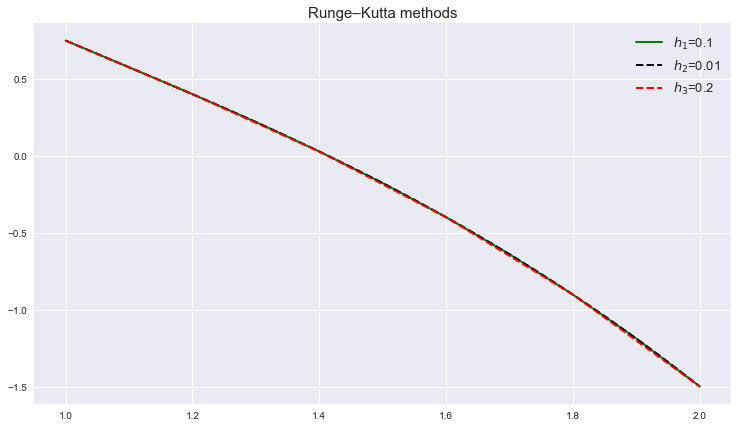

In [10]:
data1 = Runge_Kutta(x_0,y_0,x_1,h_1)
data2 = Runge_Kutta(x_0,y_0,x_1,h_2)
data3 = Runge_Kutta(x_0,y_0,x_1,0.2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['y'],'-g', label = '$h_1$='+str(h_1),linewidth = 2)
ax.plot(data2['x'],data2['y'],'--k', label = '$h_2$='+str(h_2),linewidth = 2)
ax.plot(data3['x'],data3['y'],'--r', label = '$h_3$='+str(0.2),linewidth = 2)
plt.legend(fontsize = 13)
plt.title('Runge–Kutta methods', size = 15)
plt.show()

In [19]:
abs(data1['y'][::2] - data3['y']) / (2**4-1)

array([0.00000000e+00, 3.70074342e-18, 5.55111512e-18, 7.40148683e-18,
       7.40148683e-18, 1.48029737e-17])